# Project: Investigate a Dataset - TMDb Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: The dataset that I choose to analyst is tmdb-movies.csv, which contains information about 10,000 movies collected from The Movie Database. Data contains revenue of the movie, budget of the movie, the popularity of the movie, actors,...


### Question(s) for Analysis

> **Question 1: **: Which genres are most popular from year to year?

> **Question 2: **: What kinds of properties are associated with movies that have high revenues?

> **Question 3: **: Top 10 movies got rated in all times?

In [41]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [42]:
# print dataframe information
def get_data_info(dataframe):
    print(dataframe.info())
    print(dataframe.describe())

# return array by split
def split_string_to_array(df, name, split_character="|"):
    return df[name].str.split(split_character)

<a id='wrangling'></a>
## Data Wrangling

In [43]:
# Load your data and print out a few lines. What is the size of your dataframe? 
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [44]:
# describe for movie dataset
get_data_info(dataframe=df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Missing data
- imdb_id
- cast
- homepage
- director
- tagline
- keywords
- overview
- genres
- production_companies

In [45]:
# some information about movie dataset
get_data_info(dataframe=df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


### Data Cleaning
 

In [46]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# Drop columns doesn't need
df.drop(columns=['homepage', 'tagline', 'overview'], inplace=True)

# Remove missing values
df.dropna(inplace=True)

In [47]:
# check duplicates data => 1 duplicate
sum(df.duplicated())

# Remove duplicate data
df.drop_duplicates(inplace=True)

In [48]:
get_data_info(dataframe=df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8664 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    8664 non-null   int64  
 1   imdb_id               8664 non-null   object 
 2   popularity            8664 non-null   float64
 3   budget                8664 non-null   int64  
 4   revenue               8664 non-null   int64  
 5   original_title        8664 non-null   object 
 6   cast                  8664 non-null   object 
 7   director              8664 non-null   object 
 8   keywords              8664 non-null   object 
 9   runtime               8664 non-null   int64  
 10  genres                8664 non-null   object 
 11  production_companies  8664 non-null   object 
 12  release_date          8664 non-null   object 
 13  vote_count            8664 non-null   int64  
 14  vote_average          8664 non-null   float64
 15  release_year        

In [49]:
# Convert release_date to datetime type
df['release_date'] = pd.to_datetime(df['release_date'])

# Split the genre string using str.split() and explode
df['cast'] = split_string_to_array(df, 'cast')
df['genres'] = split_string_to_array(df, 'genres')
df['keywords'] = split_string_to_array(df, 'keywords')
df['production_companies'] = split_string_to_array(df, 'production_companies')

In [50]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,"[monster, dna, tyrannosaurus rex, velociraptor...",124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,"[future, chase, post-apocalyptic, dystopia, au...",120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,"[based on novel, revolution, dystopia, sequel,...",119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",J.J. Abrams,"[android, spaceship, jedi, space opera, 3d]",136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",James Wan,"[car race, speed, revenge, suspense, car]",137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>


### Which genres are most popular from year to year?

In [51]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

# Create genres list
df_genres = df.explode('genres')

min_year = df_genres['release_year'].min()
max_year = df_genres['release_year'].max()

# Group list by release_year and genres, count
total_count_genres_year = df_genres.groupby(['release_year', 'genres'], as_index=False)['popularity'].sum()

# Find index of genres most popular
mean_genres_count_year = total_count_genres_year.groupby('genres').mean()
mean_genres_count_year.drop(columns=['release_year'], inplace=True)


mean_genres_count_year

,popularity
genres,
Action,37.226300
Adventure,29.071469
Animation,10.411932
Comedy,36.660986
Crime,16.996085
Documentary,1.736541
Drama,46.217118
Family,15.543559
Fantasy,16.150472


> Now we have a list of popularity for all of the movie genres from 1960 to 2015.
Surprisingly, Drama is the most popularity from 1960 to 2015

### What kinds of properties are associated with movies that have high revenues?

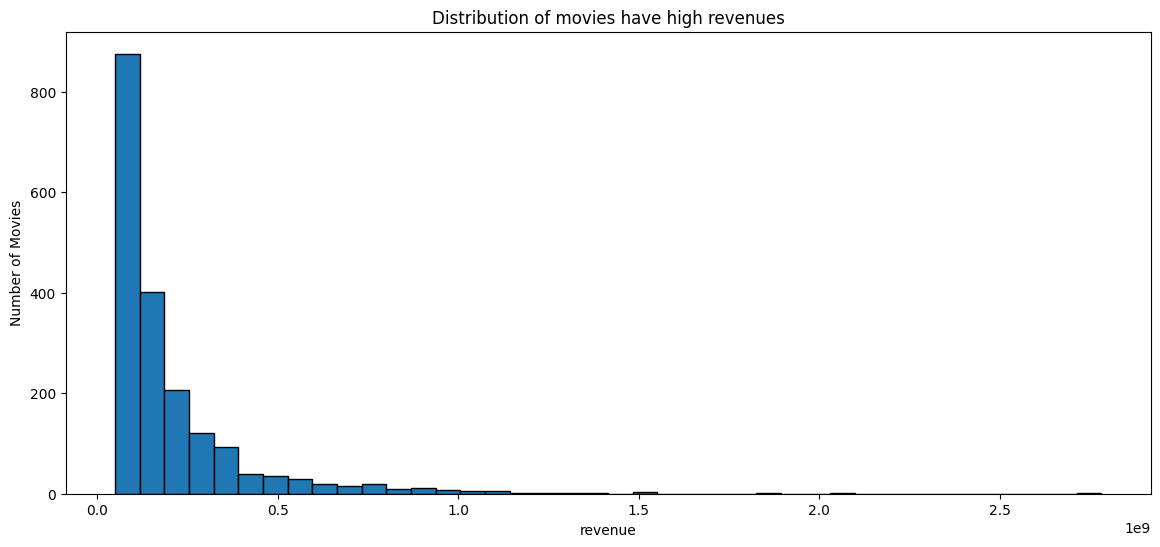

In [52]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
# Get movie have high revenue than an average movie earn
def draw_hist(dataframe, columnname, title):
    dataframe[columnname].hist(grid=False, bins=40, edgecolor='black', figsize=[14,6])
    plt.xlabel(columnname)
    plt.ylabel('Number of Movies')
    plt.title(title)
top_revenue = df.query('revenue >= revenue.mean()')
draw_hist(dataframe=top_revenue, columnname='revenue', title='Distribution of movies have high revenues')

> Notice that even though in high revenues group, there are not much movies can have high revenues.

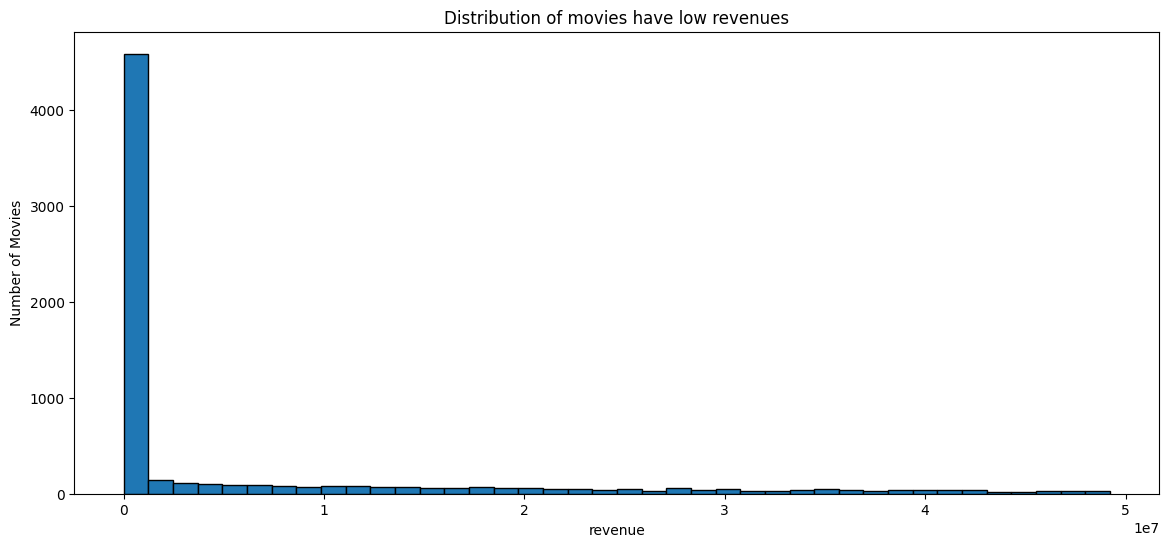

In [53]:
# Get movie have revenue lower than an average movie earn
bot_revenue = df.query('revenue < revenue.mean()')
draw_hist(dataframe=bot_revenue, columnname='revenue', title='Distribution of movies have low revenues')

> When compare low revenues to high revenues group, there are 3 times of movies compare to high revenues group.
It mean movie can reach high revenue but only for a few, most of the movie can reach the low revenue or medium revenue. That amount almost equal to their budget.

### Top 10 movies got rated in all times?

In [59]:
top_10_movies_rated = df.sort_values(by=['vote_count'], ascending=False)
top_10_movies_rated = top_10_movies_rated.iloc[:10, :]
top_10 = pd.DataFrame(
    {
        "movie_original_title": top_10_movies_rated['original_title'],
        "vote_count": top_10_movies_rated['vote_count'],
    },
)
top_10

,movie_original_title,vote_count
1919,Inception,9767
4361,The Avengers,8903
1386,Avatar,8458
2875,The Dark Knight,8432
4364,Django Unchained,7375
4382,The Hunger Games,7080
5425,Iron Man 3,6882
4363,The Dark Knight Rises,6723
629,Interstellar,6498
4367,The Hobbit: An Unexpected Journey,6417


> The top movie will be `Inception` with the number of votes `9767`

### chart for the question "Which genres are most popular from year to year?"
```
Genre "Drama" is the most popular among years
```

<AxesSubplot: title={'center': 'The genre are the most popular from year to year'}, ylabel='popularity'>

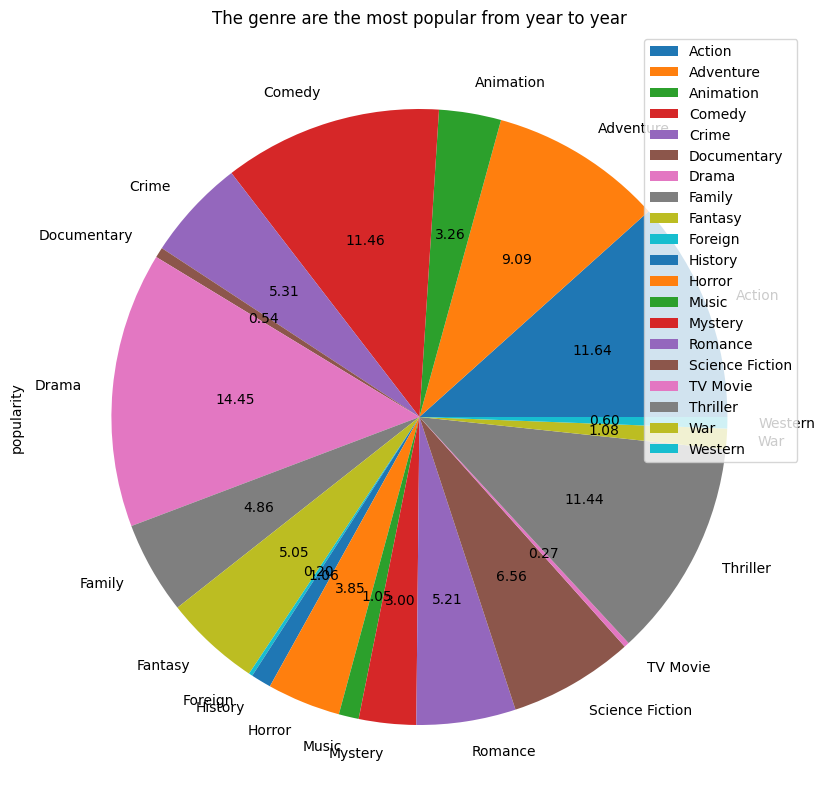

In [55]:
mean_genres_count_year.plot.pie(
    y='popularity',
    figsize=(10, 10),
    autopct='%.2f',
    title="The genre are the most popular from year to year")

> The chart "The genre are the most popular from year to year" above illustrates the percentage of movie genres popularity.
First I group the data with the year of the movie release_year and it genre.
After that I will sum the total of the popularity score and then calculate the average score for popularity of the genre and release_year.
And after go through all of that, I will have list of genres with popularity from year to year.
So we can see 'Drama' genre is the most favourite or the most popularity genre of all time from year to year according to the data.

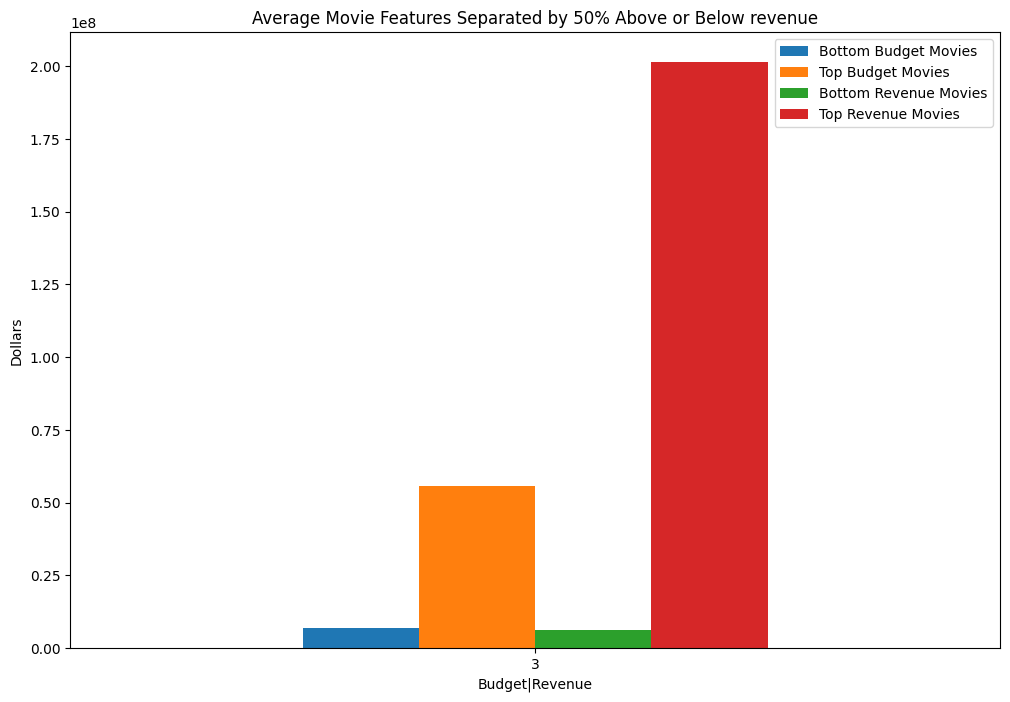

In [56]:
pd.DataFrame(
    {
        "Bottom Budget Movies": bot_revenue.mean(numeric_only=True)['budget'],
        "Top Budget Movies": top_revenue.mean(numeric_only=True)['budget'],
        "Bottom Revenue Movies": bot_revenue.mean(numeric_only=True)['revenue'],
        "Top Revenue Movies": top_revenue.mean(numeric_only=True)['revenue'],
    },
    index=[3]
).plot(
    kind="bar",
    title="Average Movie Features Separated by 50% Above or Below revenue",
    legend=True,
    xlabel="Budget|Revenue",
    ylabel="Dollars",
    rot=0,
    figsize=(12, 8)
);

> The chart "Average Movie Features Separated by 50% Above or Below revenue" above illustrates the movie revenues ratio with the movie budgets.
As we can see the higher the budget, the better the revenue of the movie become.

#### Top 10 movies got rated in all times?

Text(0.5, 0, 'Movie Name')

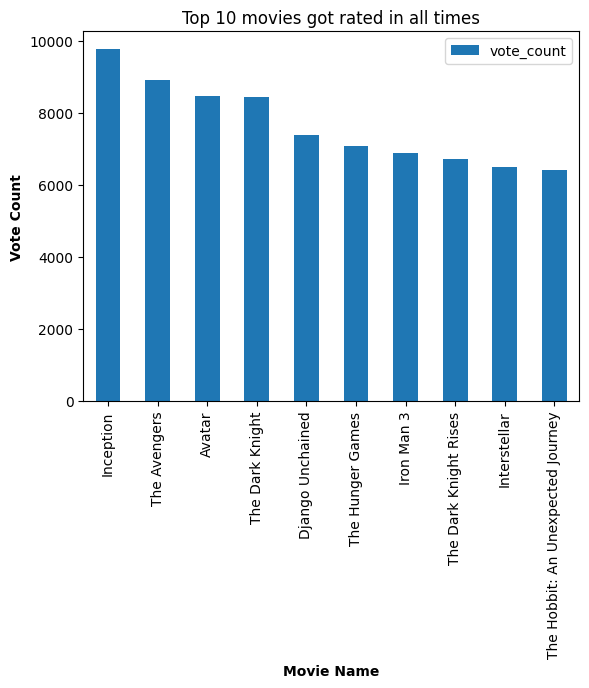

In [57]:
top_10.plot(kind='bar', y='vote_count', x='movie_original_title', title="Top 10 movies got rated in all times")
plt.ylabel('Vote count'.title(), fontsize = 10, weight = 'bold')
plt.xlabel('Movie name'.title(), fontsize = 10, weight = 'bold')

The chart "Top 10 movies got rated in all times" above illustrates the top 10 movie revenues got high rated. As we can see The top movie will be `Inception`, and the least in top 10 is `The Hobbit: An Unexpected Journey`

<a id='conclusions'></a>
# Conclusions
- Question 1: Which genres are most popular from year to year?
    + 20 different movie categories are have been made from 1960 to 2015.
    + The genre "Drama" is the most 'welcome' category, after that is genre "Action".
    + Top 4 genres are Drama, Action, Comedy, Thriller which can explain as people tend to watch movie that hit their emotion, movie contains factors like unexpected, drama, fighting, funny, scary,... more and more
- Question 2: Top 10 movies got rated in all times?
    + Low budget movie will earn almost the same amount of money from revenue as well as low budget.
    + High budget movie can earn almost third times amount of money from revenue when compare to budget.
    + We can have a conclusion that the more budget put in the movie, the higher the revenue will return.
- Question 3: Top 10 movies got rated in all times?
    + The highest rated movie is Inception.
    + Inception might be the greatest movie of all time base on audience

<a id='limitations'></a>
# Limitations
- Missing values in the data effect the results.
- Budget and revenue do not have currency unit.
- Duplicates in the data and will effect the results.
- Datatypes is not correct, have to refactor

In [58]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 652763 bytes to Investigate_a_Dataset.html
